# Capstone Project - Bank Marketing Data Analysis

## Introduction

- The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to it's customers.
- In order to increase its overall revenue, the bank conducts various campaigns for its financial products such as credit cards, term deposits, loans, etc. 
- These campaigns are intended for the bank's existing customers.
- However, the marketing campaigns need to cost efficient so that the bank not only increases their overall revenues but also the total profit.
    
     The bank conducted a telemarketing campaign for one of its financial products 'Term Deposits' to help faster long-term relationships with existing customers.
     
     The dataset contains information about all the customers who were contacted during a perticular year to open term deposit accounts.
     
**Term Deposit:-**
    
- Term deposits also called fixed deposits, are the cash investments made for a specific time period range one month to five years for predetermined fixed interest rates.
- The fixed interest rates offered for term deposits are higher than the regular interst rates for savings accounts.
- The customer recieve the total amount at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period.
- Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.


**Objective:-**

- The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
- The classification goal is to predict if the client will subscribe a term deposit (variable y).



### Attributes Information :

#### bank client data:

- age (numeric)

- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

- education (categorical: "unknown","secondary","primary","tertiary")

- default: has credit in default? (binary: "yes","no")

- balance: average yearly balance, in euros (numeric)

- housing: has housing loan? (binary: "yes","no")

- loan: has personal loan? (binary: "yes","no")

#### Related with the last contact of the current campaign:

- contact: contact communication type (categorical: "unknown","telephone","cellular")

- day: last contact day of the month (numeric)

- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

- duration: last contact duration, in seconds (numeric)

#### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

- previous: number of contacts performed before this campaign and for this client (numeric)

- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Target variable:

- y - has the client subscribed a term deposit? (binary: yes, no)

### Exploratory Data Analysis

#### Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Allows to handle the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import two datasets using the read_csv() function of pandas
bank_data = pd.read_csv('bank-full.csv', sep = ';')
bank_data2 = pd.read_csv('bank.csv', sep = ';')

- 'bank' data is 10% data which is randomly taken from 'bank-full' dataset
- So, we do'nt need to combine them.
- we have to use 'bank-full' dataset for analysis.

- **Getting insights about the dataset**

In [4]:
# Getting first 5 observations of the dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Getting last 5 observations of the dataset
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# Checking the shape of the data  
bank_data.shape

(45211, 17)

- The dataset contains 45211 rows and 17 columns.

In [7]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# list of numerical variables
num_cols = bank_data._get_numeric_data().columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [9]:
# list of categorical varibales
cat_cols = [col for col in bank_data.columns if bank_data[col].dtype=="O"]
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [10]:
# count unique values in each column
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
# dropping the duplicates
bank_data.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
# Getting the information of the dataframe
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Observation:**

- The dataset contains 17 columns and 45211 rows (7 features are int64, and 10 features are object datatypes)

- There are unknown values for many variables in the Data set.

- Variables with unknown values are : 'job', 'education', 'contact', 'poutcome'.

- Unknown in 'job', 'contact' and 'poutcome' are considered as another category.

- Unknown in 'education' treated as missing values.

In [13]:
# Checking the statistical summary of the data
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


**Observation:**

- The youngest client has 17 years old and the oldest has 98 years with a median of 38 years whereas the average is 40 years old. 
- There are 12 types of job recordings in which the blue-collar role is the most common with 9732 of all clients.
- The majority of clients are married with almost 27k records.
- More than 12k people have a secondary degree.
- From all the 45211 clients, 44396 do not have any credit in default.
- Almost half of the customers have a housing loan.
- Almost 38k clients do not have any personal loans.
- From all the 45211 clients, 29285 people are contacted more in cellular.
- There is no information about the outcome of any previous marketing campaign.

#### Checking for missing values

In [14]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- There are no missing values in our data, but in our consideration unknown values in 'education' are missing values.

- So, I replaced unknown values in education column with NaN.

In [15]:
bank_data['education'] = bank_data['education'].replace('unknown', np.nan)
bank_data.isnull().sum()

age             0
job             0
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

<AxesSubplot:>

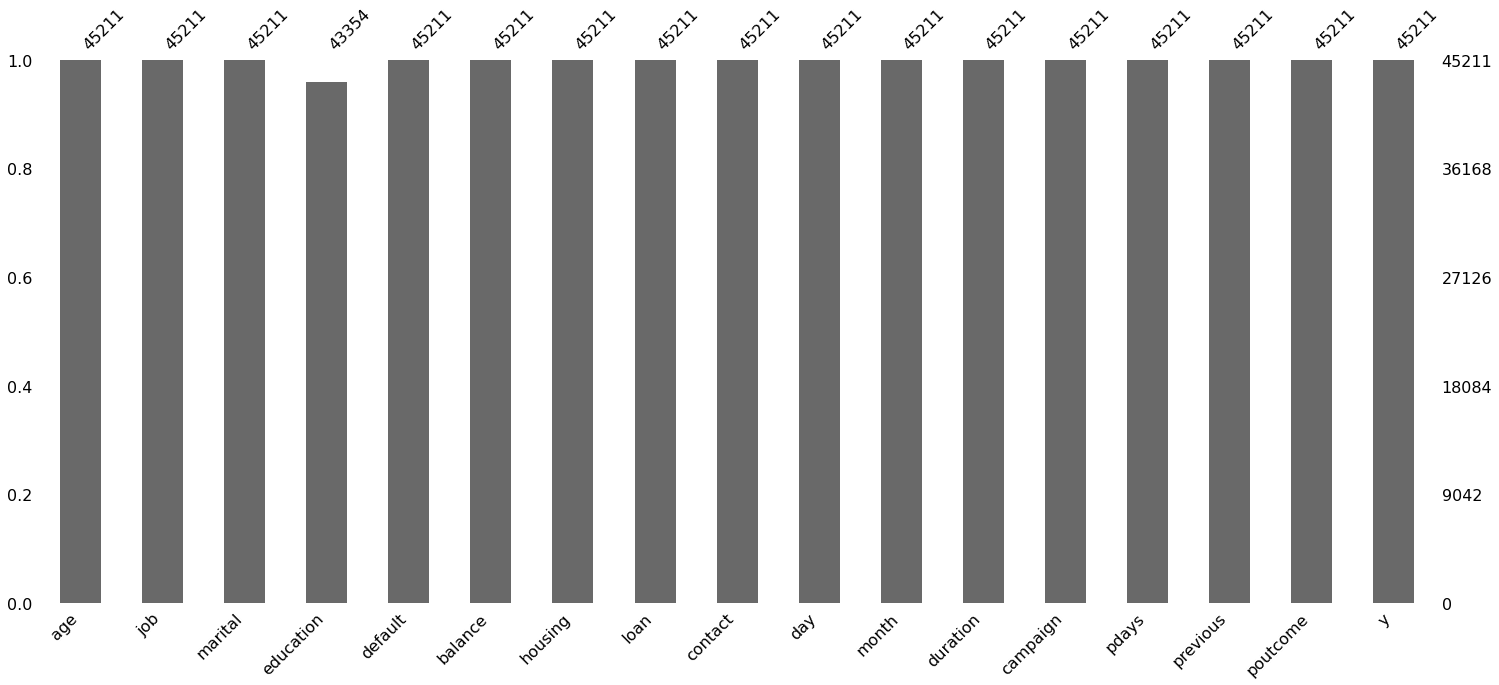

In [16]:
import missingno as msno
# creating the bar plot to see the missing values
msno.bar(bank_data)

#### Checking for Outliers

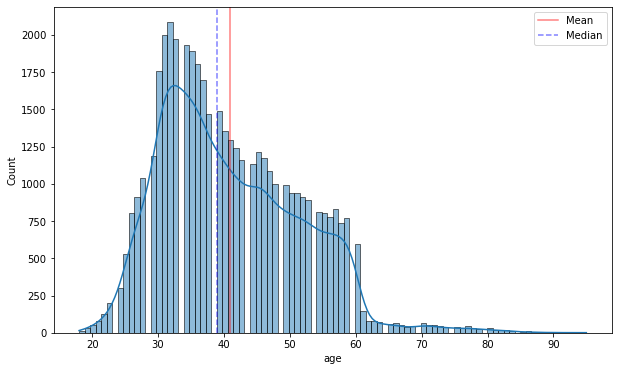

In [17]:
plt.figure(figsize = (10,6))
sns.histplot(data = bank_data['age'], kde = True)
plt.axvline(x = bank_data.age.mean(),color = 'red', alpha = 0.5, label = 'Mean')
plt.axvline(x = bank_data.age.median(),c = 'blue', ls ='--', alpha = 0.5, label = 'Median')
plt.legend()

Text(0, 0.5, 'Age')

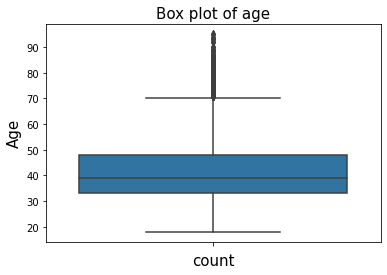

In [18]:
sns.boxplot(y='age', data=bank_data)
plt.title("Box plot of age", size=15)
plt.xlabel("count", size=15)
plt.ylabel("Age", size=15)

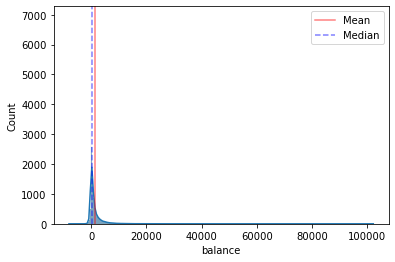

In [19]:
sns.histplot(data = bank_data['balance'], kde = True)
plt.axvline(x = bank_data.balance.mean(),color = 'red', alpha = 0.5, label = 'Mean')
plt.axvline(x = bank_data.balance.median(),c = 'blue', ls ='--', alpha = 0.5, label = 'Median')
plt.legend()

Text(0, 0.5, 'balance')

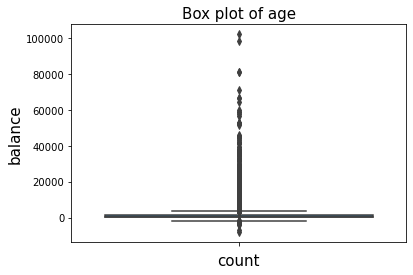

In [20]:
sns.boxplot(y='balance', data=bank_data)
plt.title("Box plot of age", size=15)
plt.xlabel("count", size=15)
plt.ylabel("balance", size=15)

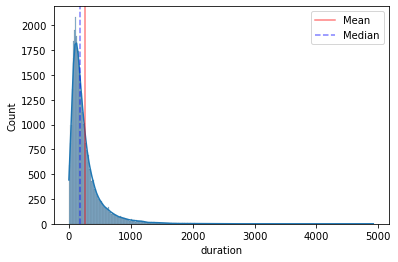

In [21]:
sns.histplot(data = bank_data['duration'], kde = True)
plt.axvline(x = bank_data.duration.mean(),color = 'red', alpha = 0.5, label = 'Mean')
plt.axvline(x = bank_data.duration.median(),c = 'blue', ls ='--', alpha = 0.5, label = 'Median')
plt.legend()

Text(0, 0.5, 'duration')

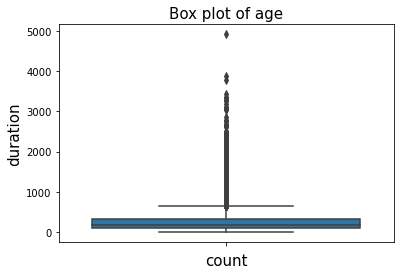

In [22]:
sns.boxplot(y='duration', data=bank_data)
plt.title("Box plot of age", size=15)
plt.xlabel("count", size=15)
plt.ylabel("duration", size=15)

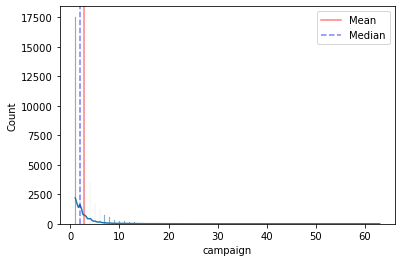

In [23]:
sns.histplot(data = bank_data['campaign'], kde = True)
plt.axvline(x = bank_data.campaign.mean(),color = 'red', alpha = 0.5, label = 'Mean')
plt.axvline(x = bank_data.campaign.median(),c = 'blue', ls ='--', alpha = 0.5, label = 'Median')
plt.legend()

Text(0, 0.5, 'campaign')

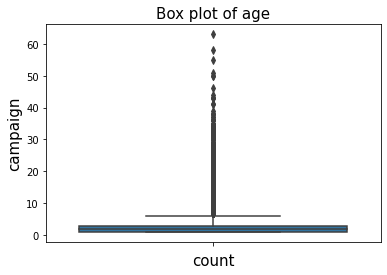

In [24]:
sns.boxplot(y='campaign', data=bank_data)
plt.title("Box plot of age", size=15)
plt.xlabel("count", size=15)
plt.ylabel("campaign", size=15)

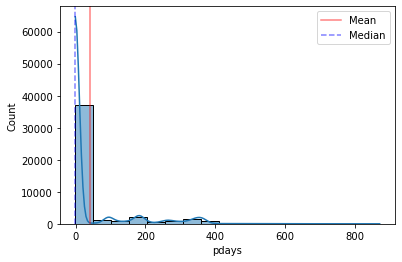

In [25]:
sns.histplot(data = bank_data['pdays'], kde = True)
plt.axvline(x = bank_data.pdays.mean(),color = 'red', alpha = 0.5, label = 'Mean')
plt.axvline(x = bank_data.pdays.median(),c = 'blue', ls ='--', alpha = 0.5, label = 'Median')
plt.legend()

Text(0, 0.5, 'pdays')

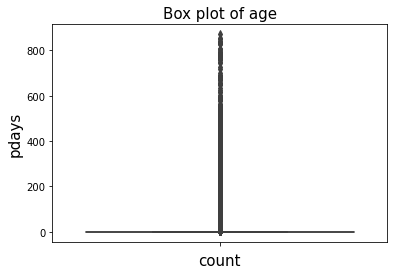

In [26]:
sns.boxplot(y='pdays', data=bank_data)
plt.title("Box plot of age", size=15)
plt.xlabel("count", size=15)
plt.ylabel("pdays", size=15)

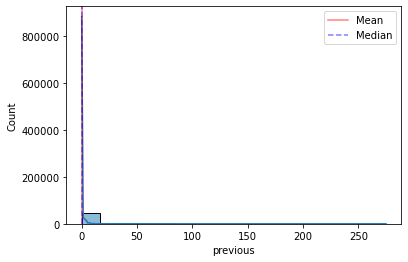

In [27]:
sns.histplot(data = bank_data['previous'], kde = True)
plt.axvline(x = bank_data.previous.mean(),color = 'red', alpha = 0.5, label = 'Mean')
plt.axvline(x = bank_data.previous.median(),c = 'blue', ls ='--', alpha = 0.5, label = 'Median')
plt.legend()

Text(0, 0.5, 'previous')

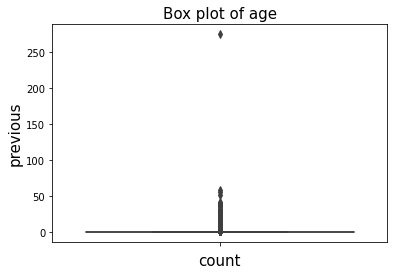

In [28]:
sns.boxplot(y='previous', data=bank_data)
plt.title("Box plot of age", size=15)
plt.xlabel("count", size=15)
plt.ylabel("previous", size=15)

**Observation:**

- From above all plots we can visually observe that our dataset is having outliers.
- So, we can remove the outliers.

### Data Cleaning

#### Dealing with missing values

Types of missing values -

- **MCAR:** It stands for Missing Completely At Rondom.
   - The reason behind the missing value is not dependent on any other feature
- **MAR:** It stands for Missing At Rondom.
   - The reason behind the missing value may be associated with some other features
- **MNAR:** It stands for Missing Not At Rondom.
   - There is a specific reason behind the missing values

- Missing values are present in education variable, this is a categorical variable.
- So, we are using mode imputation to fill those null values.

In [29]:
from sklearn.impute import SimpleImputer
cleaned_bank_data=bank_data.copy(deep=True)
mode_imputer=SimpleImputer(strategy='most_frequent')
cleaned_bank_data.iloc[:, :]=mode_imputer.fit_transform(cleaned_bank_data)

In [30]:
cleaned_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


- **Handling 'pdays' column**

In [31]:
bank_data['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

- "pdays" is using -1 as indicator and not value. Hence treat these are missing value.
- Ignore these values in our average/median/state calculations.Keeping it NaN makes more sense so Wherever pdays is -1, replacing the same with NaN.

In [32]:
bank_data1 = bank_data.copy()

In [33]:
bank_data1.drop(bank_data[bank_data['pdays']<0].index, inplace=True)

In [34]:
bank_data1['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#### Detecting the outliers

In [35]:
from scipy import stats
z = np.abs(stats.zscore(cleaned_bank_data[['age','balance','duration','campaign','pdays','previous']]))
print(z)

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


In [36]:
cleaned_bank_data=cleaned_bank_data[(z<3).all(axis=1)]
cleaned_bank_data.shape

(40209, 17)

- After detecting the outliers our dataset containing 40209 rows and 17 columns.

### Data visualization

- Converting the 'yes' and 'no' response in the bank data frame to numerical values 0 and 1 where 1 means 'yes' and 0 means 'no'. 
- Converting unknown in job variable with Other.

In [37]:
cleaned_bank_data[['default','housing','loan','y']]=cleaned_bank_data[['default','housing','loan','y']].replace(["yes","no"],["1","0"])
cleaned_bank_data['job']=cleaned_bank_data['job'].replace(['unknown'],['other'])

cleaned_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,secondary,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,other,single,secondary,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [83]:
# Performing the binning for variable "age"
labels = ['young', 'adult', 'senior', 'old']
bins = [18, 30, 50, 70, 95]
cleaned_bank_data['Age_group'] = pd.cut(cleaned_bank_data['age'], 
                          bins=bins, labels=labels)

#### Distribution of Target variable:

- First we have to look at the target variable distribution to see if it is a balanced data or not.

In [46]:
y_val=cleaned_bank_data.y.value_counts().values

In [47]:
y_name=cleaned_bank_data.y.value_counts().index

([<matplotlib.patches.Wedge at 0x26026d108b0>,
 [Text(-1.0452795612191554, 0.34262317332236886, '0'),
  Text(1.0452795371601304, -0.3426232467219696, '1')],
 [Text(-0.5701524879377211, 0.18688536726674665, '89.92%'),
  Text(0.5701524748146166, -0.18688540730289246, '10.08%')])

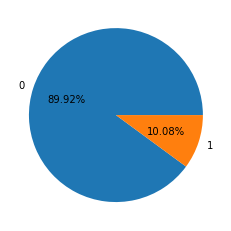

In [48]:
plt.pie(y_val,labels=y_name,autopct="%1.2f%%")

**Observation:**

- We can see from the above plot that the dataset in imbalanced, where the number of negative class is close to 8 times the number of positive class.

###  Univariate analysis

- **Categorical Variables**:

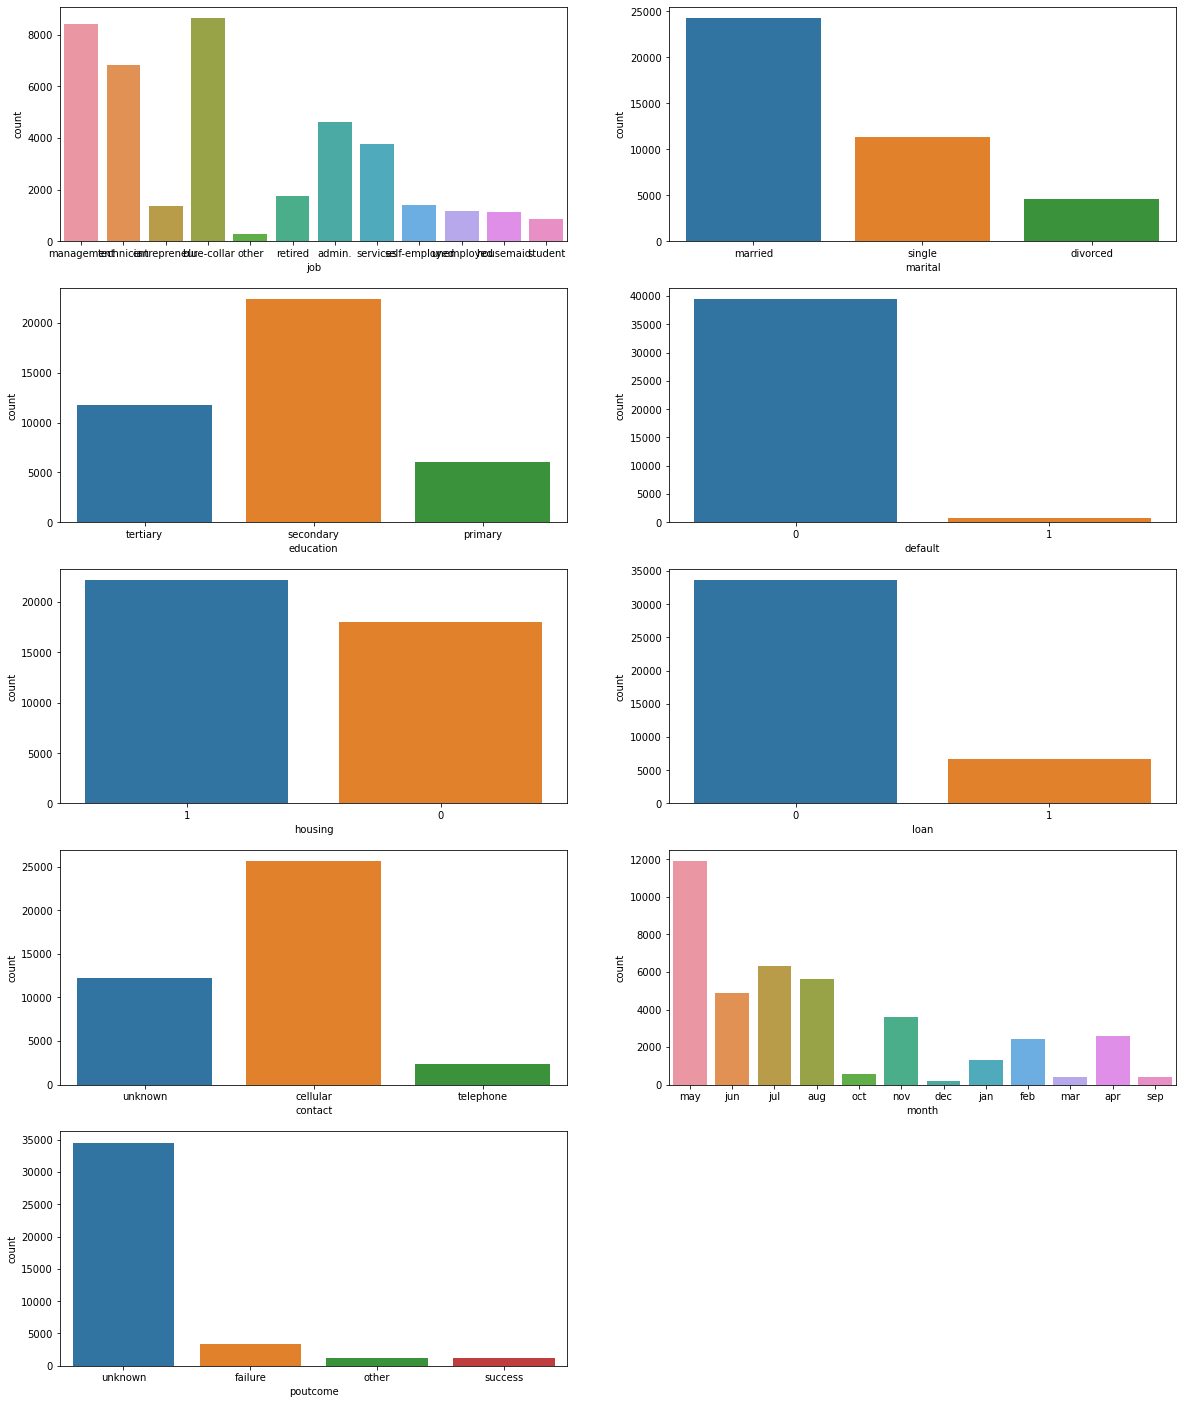

In [49]:
fig, ax = plt.subplots(5,2, figsize=(20,25))
sns.countplot(cleaned_bank_data.job,  ax=ax[0,0]) 
sns.countplot(cleaned_bank_data.marital, ax=ax[0,1]) 
sns.countplot(cleaned_bank_data.education, ax=ax[1,0]) 
sns.countplot(cleaned_bank_data.default, ax=ax[1,1])
sns.countplot(cleaned_bank_data.housing, ax=ax[2,0])
sns.countplot(cleaned_bank_data.loan, ax=ax[2,1]) 
sns.countplot(cleaned_bank_data.contact, ax=ax[3,0])
sns.countplot(cleaned_bank_data.month, ax=ax[3,1])
sns.countplot(cleaned_bank_data.poutcome, ax=ax[4,0])
fig.delaxes(ax= ax[4,1])

**Observations:**

- people with blue-collar and management jobs have been contacted more by the bank.
- People who are married are contacted more by the bank. 
- Most people are contacted more in cellular than telephone.
- Most of the people who are contacted have secondary education.
- We can clearly see that the people with default status as ‘no’ are the most who have been contacted by the bank for the deposits. People with default status ‘yes’ have not been contacted by the bank at all.
- People with housing loan are the most ones who have been contacted by the bank followed by people with no housing loan.
- People with no personal loan are the most ones who have been contacted by the bank for the deposits. Very few people with personal loan are contacted by the bank for the deposits.
- People have been contacted more in the month of May, followed by July, August, June. Very few people have been contacted in the month of december.
- majority of the outcome of the previous campaign is unknown.Very few people from previous marketing strategy have subscribed for the deposits.

([<matplotlib.patches.Wedge at 0x260286542e0>,
 [Text(-0.4819970800236723, 0.9887764230849427, 'adult'),
  Text(-0.04825678776006603, -1.0989409822347513, 'senior'),
  Text(0.9628801955195117, -0.5318474678667816, 'young'),
  Text(1.099971565975455, -0.007909111549680036, 'old')],
 [Text(-0.2629074981947303, 0.5393325944099687, '64.44%'),
  Text(-0.026321884232763288, -0.599422353946228, '19.73%'),
  Text(0.525207379374279, -0.2900986188364263, '15.61%'),
  Text(0.5999844905320663, -0.004314060845280019, '0.23%')])

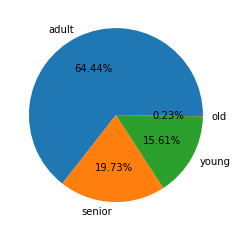

In [50]:
age_val=cleaned_bank_data.Age_group.value_counts().values
age_group=cleaned_bank_data.Age_group.value_counts().index
plt.pie(age_val,labels=age_group,autopct="%1.2f%%")

**Observation:**
    
- People who are adult with 64% are contacted more by the bank.

- **Numerical Variables**:

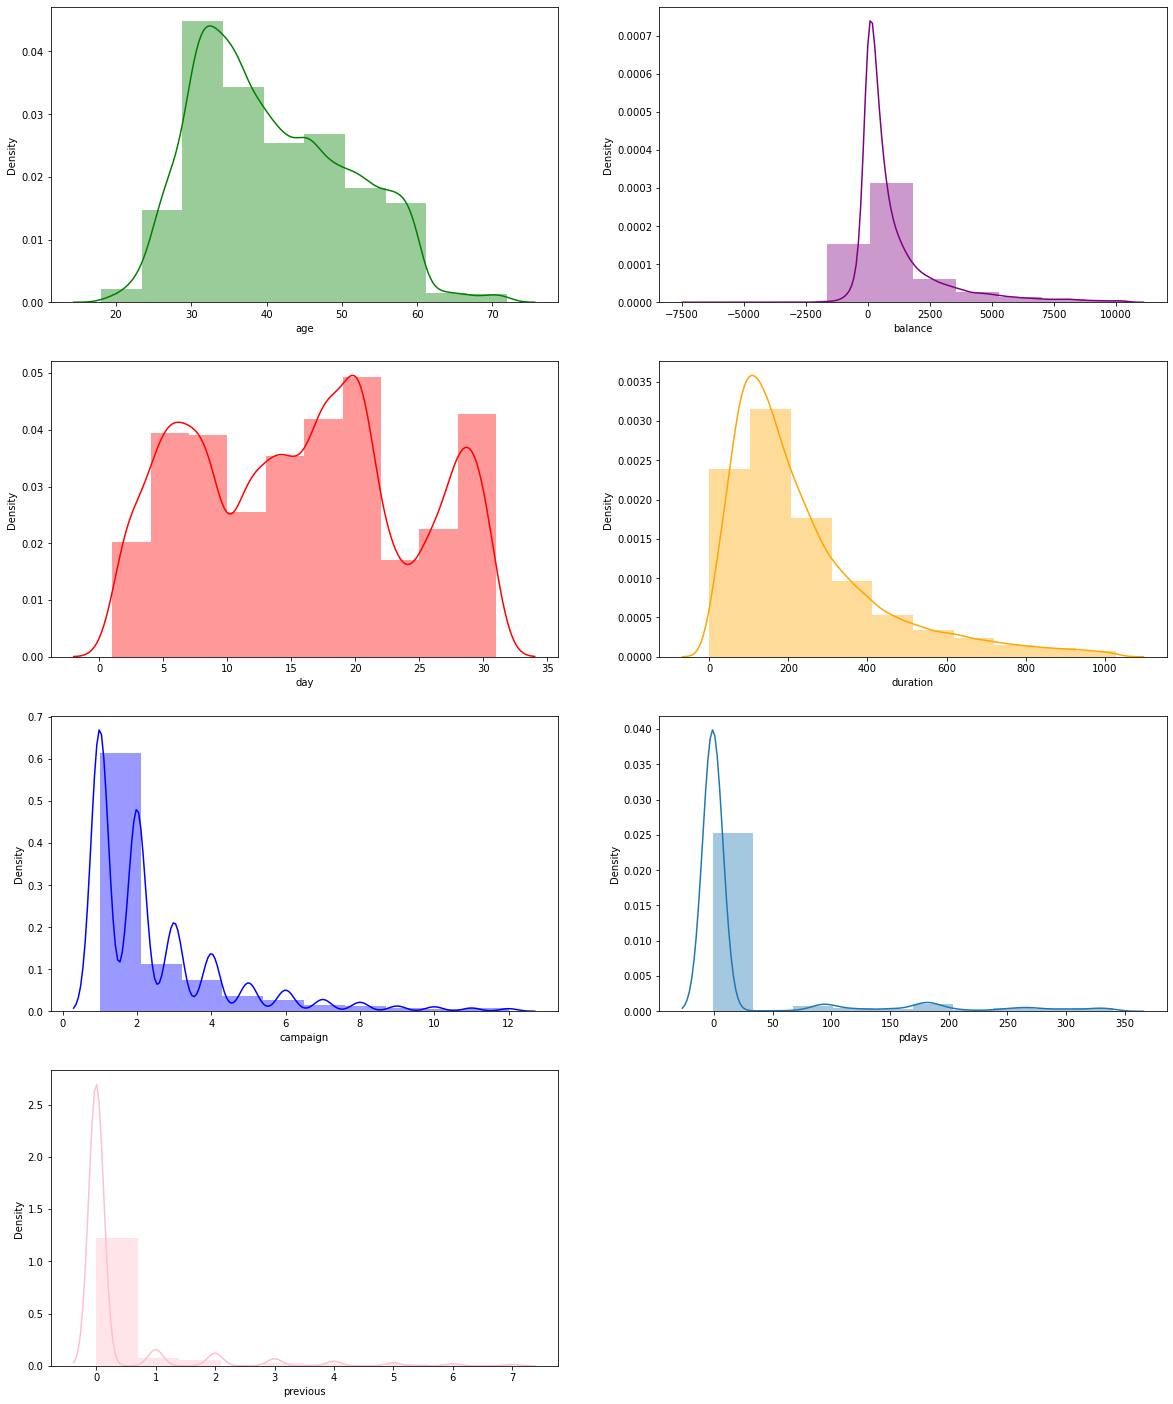

In [51]:
fig, ax = plt.subplots(4,2, figsize=(20,25)) 
sns.distplot(cleaned_bank_data.age, bins = 10, color = 'green', ax=ax[0,0]) 
sns.distplot(cleaned_bank_data.balance, bins = 10, color = 'purple', ax=ax[0,1]) 
sns.distplot(cleaned_bank_data.day, bins = 10, color = 'red', ax=ax[1,0]) 
sns.distplot(cleaned_bank_data.duration, bins = 10, color = 'orange', ax=ax[1,1])
sns.distplot(cleaned_bank_data.campaign, bins = 10, color = 'blue', ax=ax[2,0])
sns.distplot(cleaned_bank_data.pdays, bins = 10, ax=ax[2,1])
sns.distplot(cleaned_bank_data.previous, bins = 10, color = 'pink', ax=ax[3,0])
fig.delaxes(ax= ax[3,1])

### Bivariate analysis

- Destribution of each feature with target variable:

- First we have to look to at 'age' with 'y'

Text(0, 0.5, 'y')

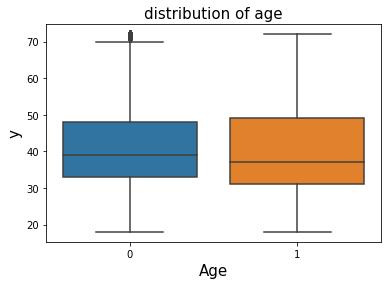

In [80]:
sns.boxplot(y='age',data=cleaned_bank_data,x='y'
plt.title("distribution of age", size=15)
plt.xlabel("Age", size=15)
plt.ylabel("y", size=15)

**Observation:**

- From the above boxplot we can clearly see that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 30–50.

Text(0, 0.5, 'Total count')

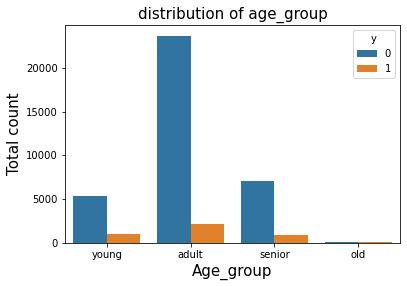

In [52]:
sns.countplot(x='Age_group',data=cleaned_bank_data,hue='y')
plt.title("distribution of age_group", size=15)
plt.xlabel("Age_group", size=15)
plt.ylabel("Total count", size=15)

**Observation:**

- People who are adult have subscribed for deposits more than people with any other age group. 

Text(0, 0.5, 'Total count')

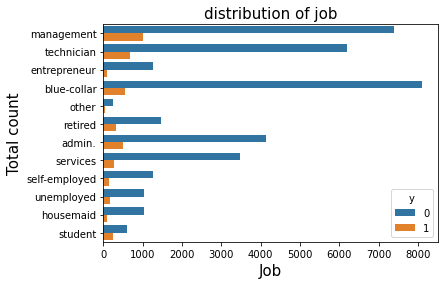

In [53]:
sns.countplot(y='job',data=cleaned_bank_data,hue='y')
plt.title("distribution of job", size=15)
plt.xlabel("Job", size=15)
plt.ylabel("Total count", size=15)

**Observation:**

- From the above plot we can observe people with management and technician jobs have subscribed more for the deposits than people with any other profession

Text(0, 0.5, 'Total count')

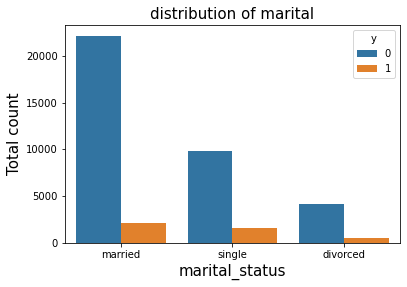

In [54]:
sns.countplot(x='marital',data=cleaned_bank_data,hue='y')
plt.title("distribution of marital", size=15)
plt.xlabel("marital_status", size=15)
plt.ylabel("Total count", size=15)

**Observation:**

- People who are married have subscribed for deposits more than people with any other marital status. 

Text(0, 0.5, 'total_count')

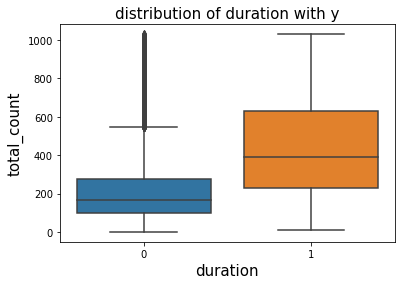

In [55]:
sns.boxplot(y='duration',data=cleaned_bank_data,x='y')
plt.title("distribution of duration with y", size=15)
plt.xlabel("duration", size=15)
plt.ylabel("total_count", size=15)

**Observation:**

- From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

Text(0, 0.5, 'total_count')

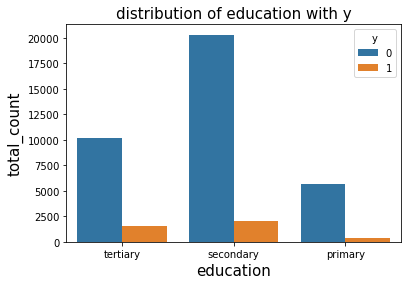

In [56]:
sns.countplot(x='education',data=cleaned_bank_data,hue='y')
plt.title("distribution of education with y", size=15)
plt.xlabel("education", size=15)
plt.ylabel("total_count", size=15)

**Observation:**

- People with secondary degree as education qualification are the most who have subscribed for the deposits. They are also the most who have not subscribed for deposits.

Text(0, 0.5, 'total_count')

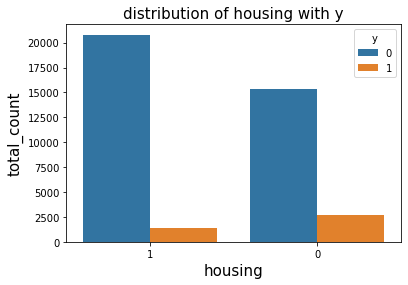

In [57]:
sns.countplot(x='housing',data=cleaned_bank_data,hue='y')
plt.title("distribution of housing with y", size=15)
plt.xlabel("housing", size=15)
plt.ylabel("total_count", size=15)

**Observations:**

- People with housing loan are the most ones who have not subscribed for deposits.

Text(0, 0.5, 'total_count')

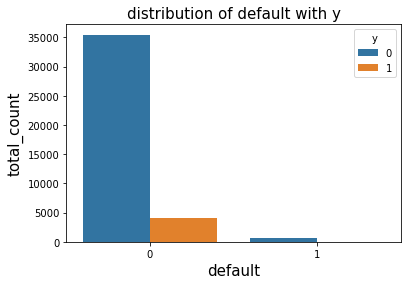

In [58]:
sns.countplot(x='default',data=cleaned_bank_data,hue='y')
plt.title("distribution of default with y", size=15)
plt.xlabel("default", size=15)
plt.ylabel("total_count", size=15)

**Observation:**

- People with default status as no are the most one’s who have and have not subscribed for bank deposits.

Text(0, 0.5, 'total_count')

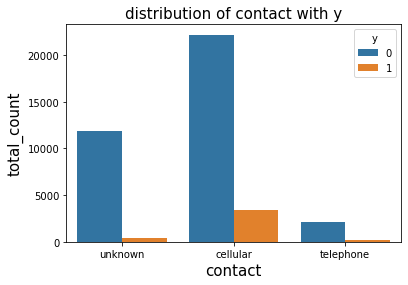

In [59]:
sns.countplot(x='contact',data=cleaned_bank_data,hue='y')
plt.title("distribution of contact with y", size=15)
plt.xlabel("contact", size=15)
plt.ylabel("total_count", size=15)

**Observation:**

- More people contacted on cellular by bank have subscribed the deposits offered by the bank than the ones contacted on telephone.

Text(0, 0.5, 'total_count')

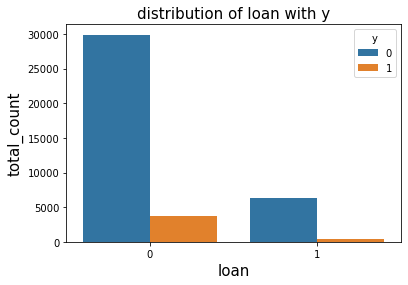

In [60]:
sns.countplot(x='loan',data=cleaned_bank_data,hue='y')
plt.title("distribution of loan with y", size=15)
plt.xlabel("loan", size=15)
plt.ylabel("total_count", size=15)

**Observation:**

- People with no personal loan are the most ones who have not subscribed for the deposits offered by the bank. People with no personal loan are the most ones also who have subscribed for the deposits.

Text(0, 0.5, 'total_count')

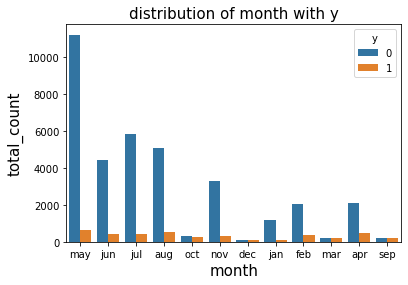

In [61]:
sns.countplot(x='month',data=cleaned_bank_data,hue='y')
plt.title("distribution of month with y", size=15)
plt.xlabel("month", size=15)
plt.ylabel("total_count", size=15)

**Observation:**

- People contacted in May have higher chances to subscribe for longer term deposits but have also higher chances for not subscribing the long term deposits.

Text(0, 0.5, 'total_count')

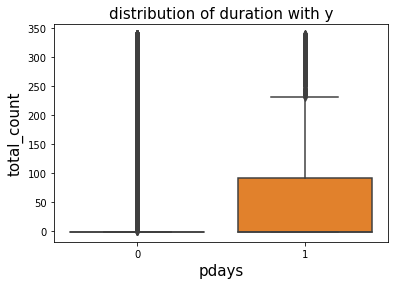

In [67]:
sns.boxplot(y='pdays',data=cleaned_bank_data,x='y')
plt.title("distribution of duration with y", size=15)
plt.xlabel("pdays", size=15)
plt.ylabel("total_count", size=15)

Text(0, 0.5, 'total_count')

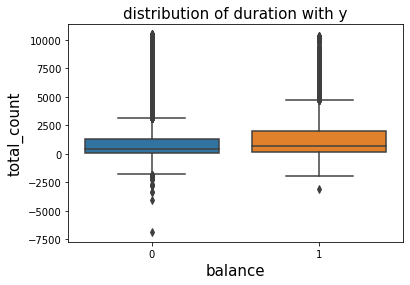

In [69]:
sns.boxplot(y='balance',data=cleaned_bank_data,x='y')
plt.title("distribution of duration with y", size=15)
plt.xlabel("balance", size=15)
plt.ylabel("total_count", size=15)

Text(0, 0.5, 'total_count')

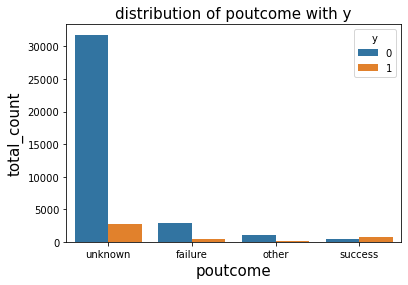

In [62]:
sns.countplot(x='poutcome',data=cleaned_bank_data,hue='y')
plt.title("distribution of poutcome with y", size=15)
plt.xlabel("poutcome", size=15)
plt.ylabel("total_count", size=15)

**Observation:**

- From the above plot, people whose previous outcome is unknown have actually subscribed more than any other group of people belonging to previous outcome. Among the group of people with previous outcome as success, people have actually subscribed more for the deposits than people who have not subscribed for the deposits.

### Multivariate analysis

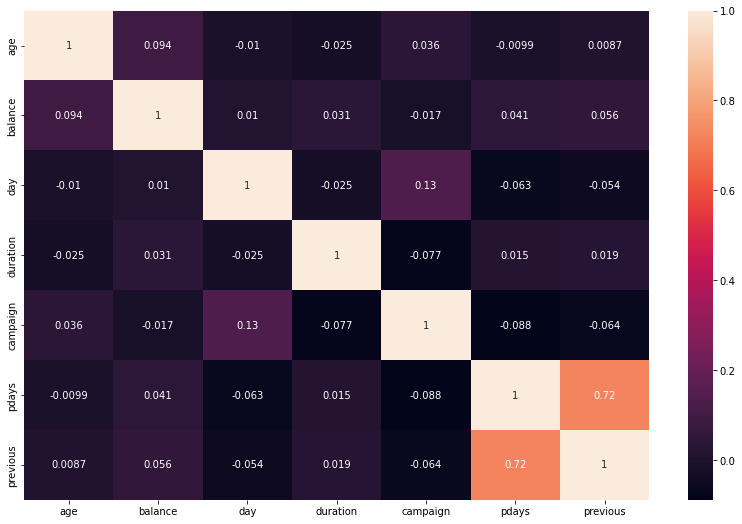

In [79]:
correlation_metrics=cleaned_bank_data.corr()
fig= plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, annot=True)

plt.show()

**Observation:**

- It is observed that no variables in the dataset has any correlation with age, salary, duration and balance.

- The campaign variables has a weak correlation with the day variables whilst having no correlation with the other variables in the data set.

- The pdays variables which is the number of days that passed by after the client was last contacted from a previous campaign and the previous variables has a weak correlation

- From the above observation we can plot relationship between pdays and previous

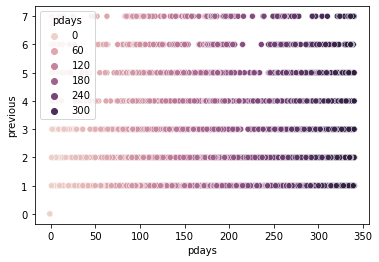

In [82]:
sns.scatterplot(x='pdays', y='previous', data=cleaned_bank_data, hue='pdays');

**Conclusion:**
    
- The customer's account balance has a huge influence on the campaign's outcome.
- The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.
- People with credit in default did not subscribe.
- Number of contacts with the customer during the campaign is also very important.
- More than 60% of the people previously contacted to other campaigns subscribed.

#### Finally Iam converting cleaned dataframe to csv file for solving SQL queries

In [86]:
cleaned_bank_data.to_csv('bank_data.csv')